In [1]:
import pandas as pd
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
import pydot
import pydotplus
import re
import numpy
import seaborn as sn
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Plot Functions

In [2]:
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    #PATH = '/Users/chieh/Desktop/Milestone II/adspy_temp.dot'
    #f = str(pydot.graph_from_dot_file(PATH))
    #f = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[([0-9]+,)+\])', '', f)
    #f = re.sub('(samples = [0-9]+)(\\\\nvalue = \[([0-9]+,)+\])\\\\n', '', f)

    #with open('adspy_temp.dot', 'w') as file:
    #    dot_graph = file.write(f)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    #graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    #return graph.create_png()
    return graphviz.Source(dot_graph)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(numpy.arange(c_features), feature_names)

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()


def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X.iloc[:, 0].min()
    x_max = X.iloc[:, 0].max()
    y_min = X.iloc[:, 1].min()
    y_max = X.iloc[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X.iloc[:, 0].min()
    x_max = X.iloc[:, 0].max()
    y_min = X.iloc[:, 1].min()
    y_max = X.iloc[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    plt.show()

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat.iloc[:, 0].min() - 1, X_mat.iloc[:, 0].max() + 1
    y_min, y_max = X_mat.iloc[:, 1].min() - 1, X_mat.iloc[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()



# ROCAUC function

In [3]:
import numpy as np

from yellowbrick.exceptions import ModelError
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.style.palettes import LINE_COLOR
from yellowbrick.classifier.base import ClassificationScoreVisualizer

from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve


# Dictionary keys for ROCAUC
MACRO = "macro"
MICRO = "micro"


##########################################################################
## ROCAUC Visualizer
##########################################################################

class ROCAUC(ClassificationScoreVisualizer):
    """
    Receiver Operating Characteristic (ROC) curves are a measure of a
    classifier's predictive quality that compares and visualizes the tradeoff
    between the models' sensitivity and specificity. The ROC curve displays
    the true positive rate on the Y axis and the false positive rate on the
    X axis on both a global average and per-class basis. The ideal point is
    therefore the top-left corner of the plot: false positives are zero and
    true positives are one.

    This leads to another metric, area under the curve  (AUC), a computation
    of the relationship between false positives and true positives. The higher
    the AUC, the better the model generally is. However, it is also important
    to inspect the "steepness" of the curve, as this describes the
    maximization of the true positive rate while minimizing the false positive
    rate. Generalizing "steepness" usually leads to discussions about
    convexity, which we do not get into here.

    Parameters
    ----------
    model : estimator
        Must be a classifier, otherwise raises YellowbrickTypeError

    ax : matplotlib Axes, default: None
        The axes to plot the figure on. If None is passed in the current axes
        will be used (or generated if required).

    classes : list
        A list of class names for the legend. If classes is None and a y value
        is passed to fit then the classes are selected from the target vector.
        Note that the curves must be computed based on what is in the target
        vector passed to the ``score()`` method. Class names are used for
        labeling only and must be in the correct order to prevent confusion.

    micro : bool, default = True
        Plot the micro-averages ROC curve, computed from the sum of all true
        positives and false positives across all classes.

    macro : bool, default = True
        Plot the macro-averages ROC curve, which simply takes the average of
        curves across all classes.

    per_class : bool, default = True
        Plot the ROC curves for each individual class. This should be set
        to false if only the macro or micro average curves are required.

    kwargs : keyword arguments passed to the super class.
        Currently passing in hard-coded colors for the Receiver Operating
        Characteristic curve and the diagonal.
        These will be refactored to a default Yellowbrick style.

    Attributes
    ----------
    score_ : float
        Global accuracy score, unless micro or macro scores are requested

    Notes
    -----
    ROC curves are typically used in binary classification, and in fact the
    Scikit-Learn ``roc_curve`` metric is only able to perform metrics for
    binary classifiers. As a result it is necessary to binarize the output or
    to use one-vs-rest or one-vs-all strategies of classification. The
    visualizer does its best to handle multiple situations, but exceptions can
    arise from unexpected models or outputs.

    Another important point is the relationship of class labels specified on
    initialization to those drawn on the curves. The classes are not used to
    constrain ordering or filter curves; the ROC computation happens on the
    unique values specified in the target vector to the ``score`` method. To
    ensure the best quality visualization, do not use a LabelEncoder for this
    and do not pass in class labels.

    .. seealso:: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    .. todo:: Allow the class list to filter the curves on the visualization.

    Examples
    --------
    >>> from sklearn.datasets import load_breast_cancer
    >>> from yellowbrick.classifier import ROCAUC
    >>> from sklearn.linear_model import LogisticRegression
    >>> from sklearn.model_selection import train_test_split
    >>> data = load_breast_cancer()
    >>> X = data['data']
    >>> y = data['target']
    >>> X_train, X_test, y_train, y_test = train_test_split(X, y)
    >>> viz = ROCAUC(LogisticRegression())
    >>> viz.fit(X_train, y_train)
    >>> viz.score(X_test, y_test)
    >>> viz.show()
    """

    def __init__(self, model, ax=None, classes=None,
                 micro=True, macro=True, per_class=True, **kwargs):
        super(ROCAUC, self).__init__(model, ax=ax, classes=classes, **kwargs)

        # Set the visual parameters for ROCAUC
        self.micro = micro
        self.macro = macro
        self.per_class = per_class

    def score(self, X, y=None, **kwargs):
        """
        Generates the predicted target values using the Scikit-Learn
        estimator.

        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features

        y : ndarray or Series of length n
            An array or series of target or class values

        Returns
        -------
        score_ : float
            Global accuracy unless micro or macro scores are requested.
        """

        # Compute the predictions for the test data
        y_pred = self._get_y_scores(X)
        
        if len(y_pred.shape) == 1:
            self._binary_decision = True
            
            if self.micro or self.macro or self.per_class:
                raise ModelError(
                    "Micro, macro, and per-class scores are not defined for "
                    "binary classification for estimators with only " 
                    "decision_function methods; set micro, macro, and "
                    "per-class params to False."
                )
        else:
            self._binary_decision = False
            if not self.micro and not self.macro and not self.per_class:
                raise YellowbrickValueError(
                    "no curves will be drawn; specify micro, macro, or per_class"
                )
                
        # Classes may be label encoded so only use what's in y to compute.
        # The self.classes_ attribute will be used as names for labels.
        classes = np.unique(y)
        n_classes = len(classes)

        # Store the false positive rate, true positive rate and curve info.
        self.fpr = dict()
        self.tpr = dict()
        self.roc_auc = dict()

        # Compute ROC curve and ROC area for each class
        if self._binary_decision == True:
            self.fpr[0], self.tpr[0], _ = roc_curve(y, y_pred)
            self.roc_auc[0] = auc(self.fpr[0], self.tpr[0])
        else: 
            for i, c in enumerate(classes):
                self.fpr[i], self.tpr[i], _ = roc_curve(y, y_pred[:,i], pos_label=c)
                self.roc_auc[i] = auc(self.fpr[i], self.tpr[i])

        # Compute micro average
        if self.micro:
            self._score_micro_average(y, y_pred, classes, n_classes)

        # Compute macro average
        if self.macro:
            self._score_macro_average(y_pred, n_classes)

        # Draw the Curves
        self.draw()

        # Set score to micro average if specified
        if self.micro:
            self.score_ = self.roc_auc[MICRO]

        # Set score to macro average if not micro
        if self.macro:
            self.score_ = self.roc_auc[MACRO]

        # Set score to the base score if neither macro nor micro
        self.score_ = self.estimator.score(X, y)

        return self.score_

    def draw(self):
        """
        Renders ROC-AUC plot.
        Called internally by score, possibly more than once

        Returns
        -------
        ax : the axis with the plotted figure
        """
        colors = self.colors[0:len(self.classes_)]
        n_classes = len(colors)

        # If binary decision, plot the ROC curve
        if self._binary_decision == True:
            self.ax.plot(
                self.fpr[0], self.tpr[0],
                label='ROC for binary decision, AUC = {:0.2f}'.format(
                        self.roc_auc[0]
                )
            )
        # Otherwise plot the ROC curves for each class
        if self.per_class:
            for i, color in zip(range(n_classes), colors):
                self.ax.plot(
                    self.fpr[i], self.tpr[i], color=color,
                    label='ROC of class {}, AUC = {:0.2f}'.format(
                        self.classes_[i], self.roc_auc[i],
                    )
                )

        # Plot the ROC curve for the micro average
        if self.micro:
            self.ax.plot(
                self.fpr[MICRO], self.tpr[MICRO], linestyle="--",
                color= self.colors[len(self.classes_)-1],
                label='micro-average ROC curve, AUC = {:0.2f}'.format(
                    self.roc_auc["micro"],
                )
            )

        # Plot the ROC curve for the macro average
        if self.macro:
            self.ax.plot(
                self.fpr[MACRO], self.tpr[MACRO], linestyle="--",
                color= self.colors[len(self.classes_)-1],
                label='macro-average ROC curve, AUC = {:0.2f}'.format(
                    self.roc_auc["macro"],
                )
            )

        # Plot the line of no discrimination to compare the curve to.
        self.ax.plot([0,1], [0,1], linestyle=':', c=LINE_COLOR)
        return self.ax

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        The user calls show and show calls finalize.

        Parameters
        ----------
        kwargs: generic keyword arguments.

        """
        # Set the title and add the legend
        self.set_title('ROC Curves for {}'.format(self.name))
        self.ax.legend(loc='lower right', frameon=True)

        # Set the limits for the ROC/AUC (always between 0 and 1)
        self.ax.set_xlim([0.0, 1.0])
        self.ax.set_ylim([0.0, 1.0])

        # Set x and y axis labels
        self.ax.set_ylabel('True Postive Rate')
        self.ax.set_xlabel('False Positive Rate')

    def _get_y_scores(self, X):
        """
        The ``roc_curve`` metric requires target scores that can either be the
        probability estimates of the positive class, confidence values or non-
        thresholded measure of decisions (as returned by "decision_function").

        This method computes the scores by resolving the estimator methods
        that retreive these values.

        .. todo:: implement confidence values metric.

        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features -- generally the test data
            that is associated with y_true values.
        """
        # The resolution order of scoring functions
        attrs = (
            'predict_proba',
            'decision_function',
        )

        # Return the first resolved function
        for attr in attrs:
            try:
                method = getattr(self.estimator, attr, None)
                if method:
                    return method(X)
            except AttributeError:
                # Some Scikit-Learn estimators have both probability and
                # decision functions but override __getattr__ and raise an
                # AttributeError on access.
                continue

        # If we've gotten this far, raise an error
        raise ModelError(
            "ROCAUC requires estimators with predict_proba or "
            "decision_function methods."
        )

    def _score_micro_average(self, y, y_pred, classes, n_classes):
        """
        Compute the micro average scores for the ROCAUC curves.
        """
        # Convert y to binarized array for micro and macro scores
        y = label_binarize(y, classes=classes)
        if n_classes == 2:
            y = np.hstack((1-y, y))

        # Compute micro-average
        self.fpr[MICRO], self.tpr[MICRO], _ = roc_curve(y.ravel(), y_pred.ravel())
        self.roc_auc[MICRO] = auc(self.fpr[MICRO], self.tpr[MICRO])

    def _score_macro_average(self, y_pred, n_classes):
        """
        Compute the macro average scores for the ROCAUC curves.
        """   
        # Gather all FPRs
        all_fpr = np.unique(np.concatenate([self.fpr[i] for i in range(n_classes)]))
        avg_tpr = np.zeros_like(all_fpr)

        # Compute the averages per class
        for i in range(n_classes):
            avg_tpr += interp(all_fpr, self.fpr[i], self.tpr[i])

        # Finalize the average
        avg_tpr /= n_classes

        # Store the macro averages
        self.fpr[MACRO] = all_fpr
        self.tpr[MACRO] = avg_tpr
        self.roc_auc[MACRO] = auc(self.fpr[MACRO], self.tpr[MACRO])


##########################################################################
## Quick method for ROCAUC
##########################################################################

def roc_auc(model, X, y=None, ax=None, **kwargs):
    """ROCAUC Quick method:

    Receiver Operating Characteristic (ROC) curves are a measure of a
    classifier's predictive quality that compares and visualizes the tradeoff
    between the models' sensitivity and specificity. The ROC curve displays
    the true positive rate on the Y axis and the false positive rate on the
    X axis on both a global average and per-class basis. The ideal point is
    therefore the top-left corner of the plot: false positives are zero and
    true positives are one.

    This leads to another metric, area under the curve  (AUC), a computation
    of the relationship between false positives and true positives. The higher
    the AUC, the better the model generally is. However, it is also important
    to inspect the "steepness" of the curve, as this describes the
    maximization of the true positive rate while minimizing the false positive
    rate. Generalizing "steepness" usually leads to discussions about
    convexity, which we do not get into here.

    Parameters
    ----------
    model : the Scikit-Learn estimator
        Should be an instance of a classifier, else the __init__ will
        return an error.

    X : ndarray or DataFrame of shape n x m
        A matrix of n instances with m features

    y : ndarray or Series of length n
        An array or series of target or class values

    ax : the axis to plot the figure on.

    classes : list
        A list of class names for the legend. If classes is None and a y value
        is passed to fit then the classes are selected from the target vector.
        Note that the curves must be computed based on what is in the target
        vector passed to the ``score()`` method. Class names are used for
        labeling only and must be in the correct order to prevent confusion.

    micro : bool, default = True
        Plot the micro-averages ROC curve, computed from the sum of all true
        positives and false positives across all classes.

    macro : bool, default = True
        Plot the macro-averages ROC curve, which simply takes the average of
        curves across all classes.

    per_class : bool, default = True
        Plot the ROC curves for each individual class. Primarily this is set
        to false if only the macro or micro average curves are required.

    Notes
    -----
    ROC curves are typically used in binary classification, and in fact the
    Scikit-Learn ``roc_curve`` metric is only able to perform metrics for
    binary classifiers. As a result it is necessary to binarize the output or
    to use one-vs-rest or one-vs-all strategies of classification. The
    visualizer does its best to handle multiple situations, but exceptions can
    arise from unexpected models or outputs.

    Another important point is the relationship of class labels specified on
    initialization to those drawn on the curves. The classes are not used to
    constrain ordering or filter curves; the ROC computation happens on the
    unique values specified in the target vector to the ``score`` method. To
    ensure the best quality visualization, do not use a LabelEncoder for this
    and do not pass in class labels.

    .. seealso:: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    .. todo:: Allow the class list to filter the curves on the visualization.

    Examples
    --------
    >>> from sklearn.datasets import load_breast_cancer
    >>> from yellowbrick.classifier import roc_auc
    >>> from sklearn.linear_model import LogisticRegression
    >>> data = load_breast_cancer()
    >>> roc_auc(LogisticRegression(), data.data, data.target)

    Returns
    -------
    ax : matplotlib axes
        Returns the axes that the roc-auc curve was drawn on.
    """
    # Instantiate the visualizer
    visualizer = ROCAUC(model, ax, **kwargs)

    # Create the train and test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit and transform the visualizer (calls draw)
    visualizer.fit(X_train, y_train, **kwargs)
    visualizer.score(X_test, y_test)
    visualizer.finalize()

    # Return the axes object on the visualizer
    return visualizer.ax

# Import Data

In [4]:
df = pd.read_csv('cleaned_wine.csv')
df["region_num"] = df.groupby("country_name", sort=False).ngroup()+1

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'wine ID', 'rating', 'price', 'winery',
       'winery_id', 'ratings_count', 'country_name', 'number_of_flavors',
       'black_fruit', 'citrus_fruit', 'dried_fruit', 'earth', 'floral',
       'microbio', 'non_oak', 'oak', 'red_fruit', 'spices', 'tree_fruit',
       'tropical_fruit', 'vegetal', 'region_num'],
      dtype='object')

In [6]:
df_r = df.country_name.value_counts().to_frame()
df_r = df_r.reset_index()
df_r = df_r.rename(columns={'index': 'country', 'country_name': 'count'})
df_r

country  count
0      fr   2023
1      au    738
2      us    295
3      es     88
4      ar     73
5      at      8
6      pt      6
7      cl      5
8      it      4
9      de      2

In [7]:
from sklearn.model_selection import train_test_split

X = df[['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']]
y = df['winery']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)



# Decision Tree Classifier
## classify country

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, KFold

X = df[['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']]

encoder = LabelEncoder()
y = encoder.fit_transform(df['country_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.1)

In [9]:
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.63
Accuracy of Decision Tree classifier on test set: 0.63


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


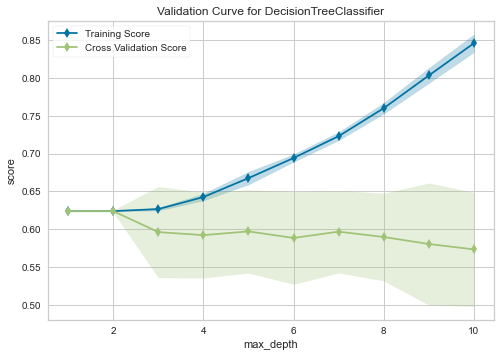

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>

In [10]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="accuracy"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [11]:
#len(list(set(df['region'].to_list())))

In [12]:
feature_names = ['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']
target_names = encoder.classes_

export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=target_names, filled = True, impurity = False)

with open("adspy_temp.dot") as f:
    dot_graph = f.read()
# Alternate method using pydotplus, if installed.
my_graph = graphviz.Source(dot_graph)
my_graph.render('decision_tree_region',format='png', view=False)

'decision_tree_region.png'

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


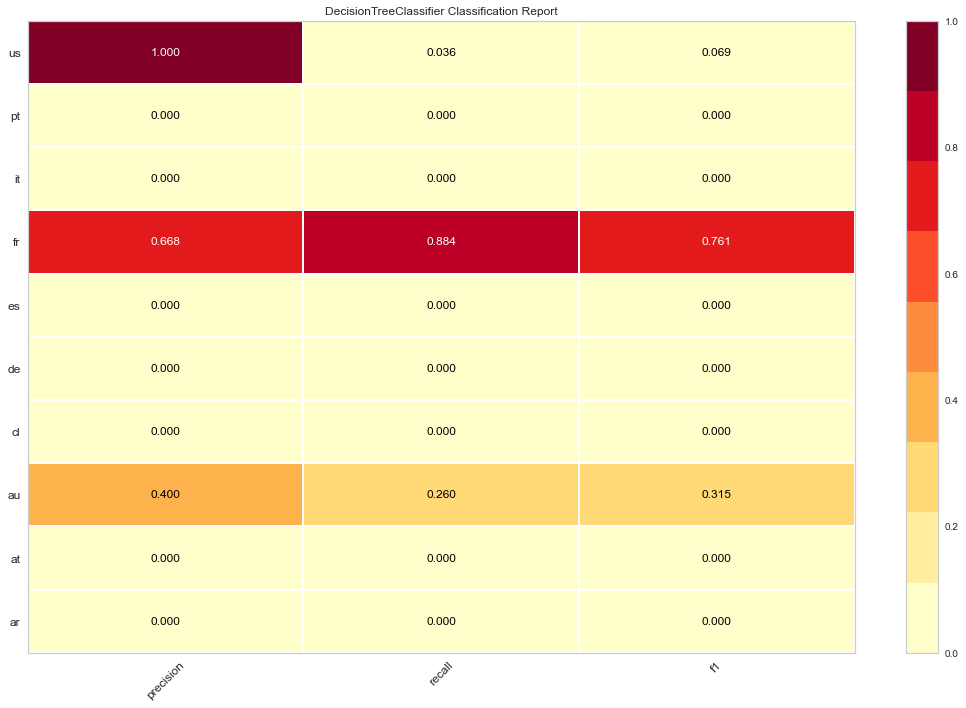

In [13]:
report = ClassificationReport(clf, size=(1080, 720), classes=encoder.classes_)

report.score(X_test, y_test)
c = report.poof()

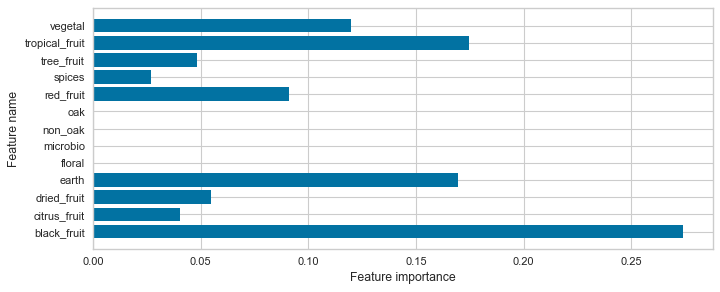

In [14]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, feature_names)
plt.show()

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


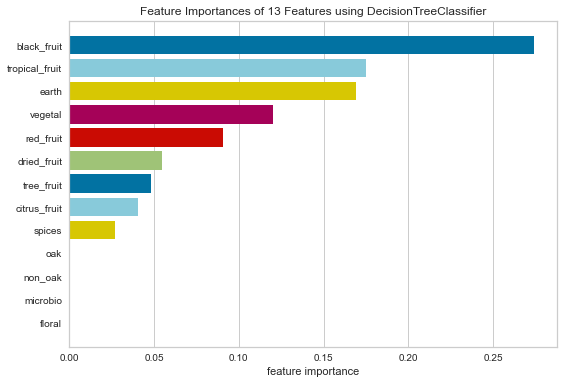

<AxesSubplot:title={'center':'Feature Importances of 13 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [15]:
from yellowbrick.features import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(clf, relative=False)
viz.fit(X_train,y_train) # Fit the data to the visualizer
viz.poof()

# Random Forest Classifier
## classify region

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)
print('Random Forest, Flavor dataset, default settings') 
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train))) 
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Random Forest, Flavor dataset, default settings
Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.65


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


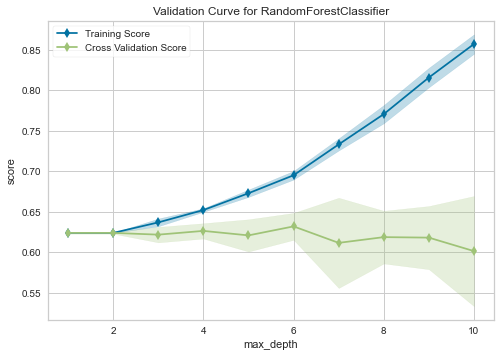

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [17]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    RandomForestClassifier(n_estimators = 10,random_state=0), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="accuracy"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


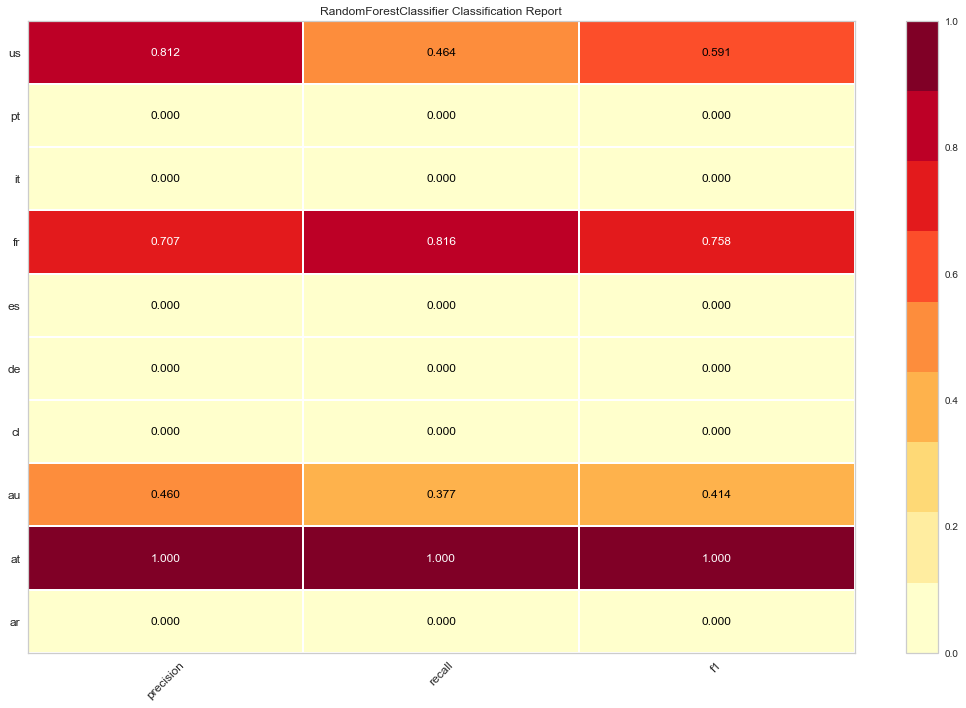

In [18]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

model =  RandomForestClassifier(n_estimators = 10, random_state=0).fit(X_train, y_train)


report = ClassificationReport(model, size=(1080, 720), classes=encoder.classes_)

report.score(X_test, y_test)
c = report.poof()

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


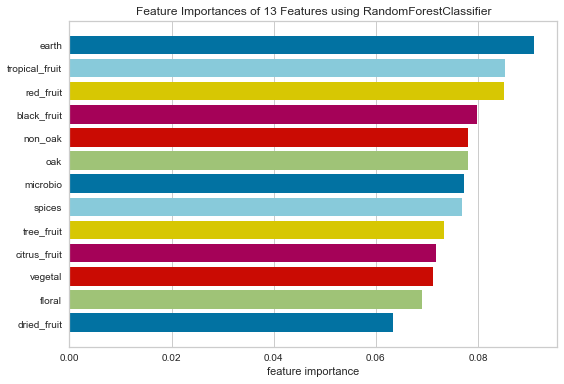

<AxesSubplot:title={'center':'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [19]:
from yellowbrick.features import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(model, relative=False)
viz.fit(X_train,y_train) # Fit the data to the visualizer
viz.poof()

In [20]:
mapping = dict(zip(range(len(encoder.classes_)),encoder.classes_))

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder=mapping)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

mapping = dict(zip(range(len(encoder.classes_)),encoder.classes_))

from itertools import cycle
# Binarize the output
y = label_binarize(y, classes=list(set(df['country_name'])))
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# GaussianNB Classifier
## classify region

In [22]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)
print('Wine dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Wine dataset
Accuracy of GaussianNB classifier on training set: 0.22
Accuracy of GaussianNB classifier on test set: 0.17


# Gradient Boosting Classifier
## classify region

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
print('Wine dataset')
print('Accuracy of GradientBoosting classifier on training set: {:.2f}'
.format(clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Wine dataset
Accuracy of GradientBoosting classifier on training set: 0.84
Accuracy of GradientBoosting classifier on test set: 0.66


from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    GradientBoostingClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="accuracy"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

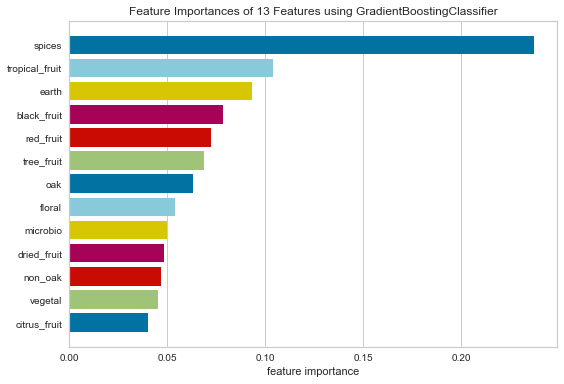

<AxesSubplot:title={'center':'Feature Importances of 13 Features using GradientBoostingClassifier'}, xlabel='feature importance'>

In [24]:
from yellowbrick.features import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(GradientBoostingClassifier(), relative=False)
viz.fit(X_train,y_train) # Fit the data to the visualizer
viz.poof() # Draw/show/poof the data

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


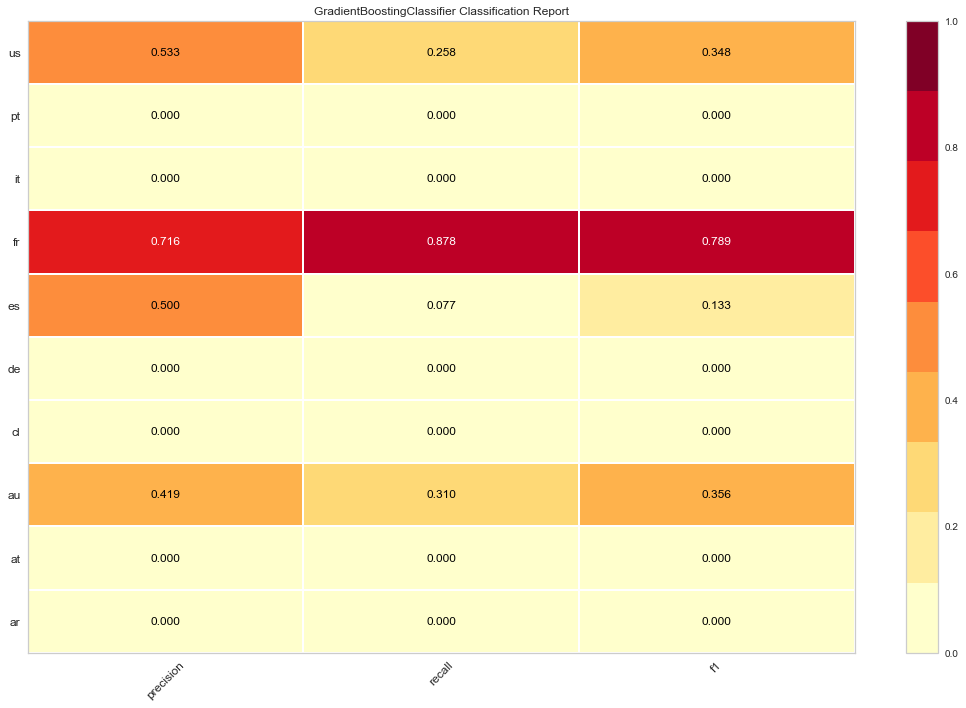

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC, SVC

model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = GradientBoostingClassifier().fit(X_train, y_train)

report = ClassificationReport(clf, size=(1080, 720), classes=encoder.classes_)

report.score(X_test, y_test)
c = report.poof()

visualizer = ROCAUC(clf)
visualizer.score(X_test, y_test)
visualizer.show()

# Class Balance

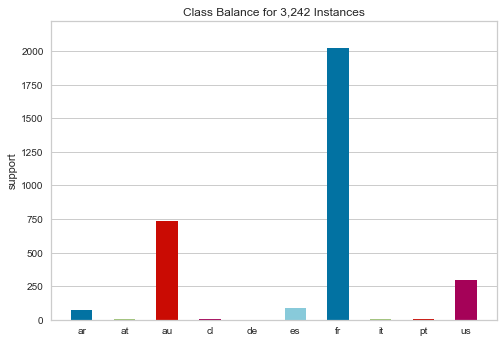

<AxesSubplot:title={'center':'Class Balance for 3,242 Instances'}, ylabel='support'>

In [27]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

classes=list(set(df['country_name']))

visualizer = ClassBalance(labels=encoder.classes_)

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Wine dataset
Accuracy of XGBClassifier on training set: 0.84
Accuracy of XGBClassifier on test set: 0.66


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


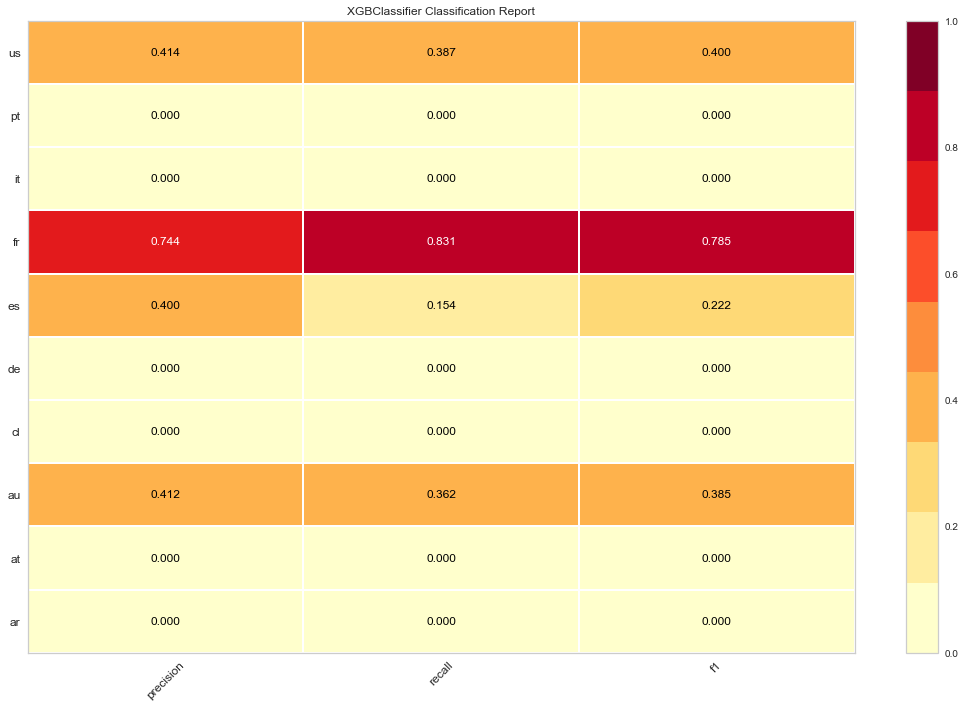

In [28]:
print('Wine dataset')
print('Accuracy of XGBClassifier on training set: {:.2f}'
.format(clf.score(X_train, y_train)))
print('Accuracy of XGBClassifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


clf = XGBClassifier(n_jobs=-1, random_state=0,objective='multi:softprob')
clf.fit(X_train, y_train)

report = ClassificationReport(clf, size=(1080, 720), classes=encoder.classes_)

report.score(X_test, y_test)
c = report.poof()

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


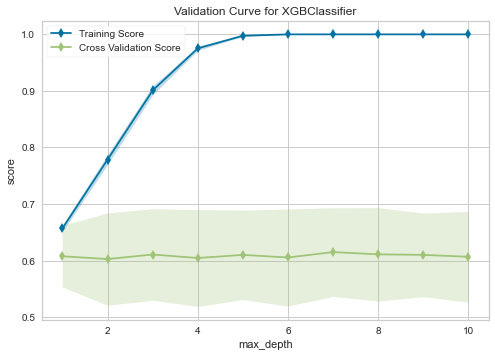

<AxesSubplot:title={'center':'Validation Curve for XGBClassifier'}, xlabel='max_depth', ylabel='score'>

In [29]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    XGBClassifier(n_jobs=-1, random_state=0,objective='multi:softprob'), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="accuracy"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

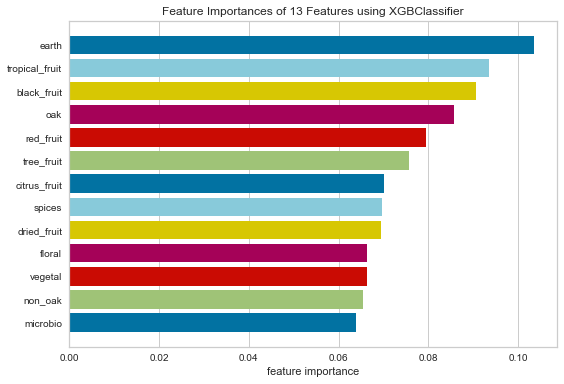

<AxesSubplot:title={'center':'Feature Importances of 13 Features using XGBClassifier'}, xlabel='feature importance'>

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(clf, relative=False)
viz.fit(X_train,y_train) # Fit the data to the visualizer
viz.poof()

[Text(0, 0, '0.61'),
 Text(0, 0, '0.65'),
 Text(0, 0, '0.66'),
 Text(0, 0, '0.63')]

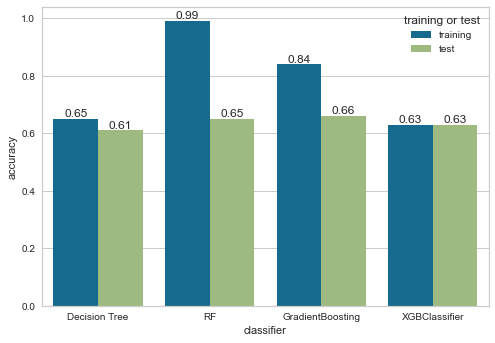

In [31]:
import seaborn as sns
d = {'classifier': ['Decision Tree','RF','GradientBoosting','XGBClassifier','Decision Tree','RF','GradientBoosting','XGBClassifier'], 'accuracy':[0.65, 0.99,0.84,0.63,0.61, 0.65,0.66,0.63],'training or test': ['training','training','training','training','test','test','test','test']}
df_ac = pd.DataFrame(data=d)

ax = sns.barplot(data=df_ac, x="classifier", y="accuracy",hue='training or test')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# One Vs Rest Classifier
## classify region

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
print('Wine dataset')
print('Accuracy of OneVsRest classifier on training set: {:.2f}'
.format(clf.score(X_train, y_train)))
print('Accuracy of OneVsRest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Wine dataset
Accuracy of OneVsRest classifier on training set: 0.63
Accuracy of OneVsRest classifier on test set: 0.67


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Visualize all the original dimensions

In [33]:
import plotly.express as px

flavors = ['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']

fig = px.scatter_matrix(
    df,
    dimensions=flavors,
    color="country_name",
    width=1800, height=1400
)
fig.update_traces(diagonal_visible=False)
fig.show()

fig.write_html("scatter_plot_original.html")

# PCA

In [34]:
from sklearn.decomposition import PCA
import plotly.express as px
pca = PCA()
components = pca.fit_transform(df[flavors])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["country_name"]
)
fig.update_traces(diagonal_visible=False)
fig.show()
fig.write_html("pca.html")

In [35]:
import plotly.graph_objs as go

features = flavors
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['country_name'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()
fig.write_html("pca_flavor.html")

# Price

In [36]:
print(df['price'].quantile(0.2))
print(df['price'].quantile(0.4))
print(df['price'].quantile(0.6))
print(df['price'].quantile(0.8))

16.173299353068025
22.348559106057635
29.35698882572045
38.70115642741226


In [37]:
cut_price = ['low','medium-low', "medium",'medium-high', 'high']
cut_bins =[0,df['price'].quantile(0.2), df['price'].quantile(0.4), df['price'].quantile(0.6), df['price'].quantile(0.8),50]
df['price_segment'] = pd.cut(df['price'], bins=cut_bins, labels = cut_price)
df

Unnamed: 0                                  name  year  wine ID  rating  \
0              0     Brut (Carte Jaune) Champagne N.V.  N.V.  1128385     4.3   
1              1          Impérial Brut Champagne N.V.  N.V.  1122095     4.1   
2              2        Edizione Cinque Autoctoni N.V.  N.V.    21646     4.3   
3              3  Special Cuvée Brut Aÿ Champagne N.V.  N.V.    18929     4.3   
4              4         Brut (Réserve) Champagne N.V.  N.V.  1129619     4.2   
...          ...                                   ...   ...      ...     ...   
3237        3237                   Medalla Malbec 2019  2019  5662688     3.9   
3238        3238         Reserve Syrah - Garnacha 2015  2015  5643330     3.9   
3239        3239      Reserva Especial Pinot Noir 2017  2017  1374725     3.8   
3240        3240                     Q Chardonnay 2020  2020    19428     3.9   
3241        3241            Numina Cabernet Franc 2020  2020  1783612     4.2   

          price             winery  winery_id  ratings_count country_name  \
0     48.470888     Veuve Clicquot       7979         120606           fr   
1     45.873358     Moët & Chandon       7799         107944           fr   
2     21.515389            Farnese       7892          61182           fr   
3     45.089198          Bollinger       7747          56458           fr   
4     38.227798         Taittinger       1285          44898           fr   
...         ...                ...        ...            ...          ...   
3237  17.162086           Trapiche       7931            421           ar   
3238  11.731046            Proemio      46478            415           ar   
3239  12.966608  Maycas del Limari      14981            404           ar   
3240  23.523192           Zuccardi       7729            394           ar   
3241  24.134184          Salentein       3754            387           ar   

      ...  microbio   non_oak       oak  red_fruit    spices  tree_fruit  \
0     ...  0.020911  0.022296  0.015372   0.001352  0.002803    0.032237   
1     ...  0.019862  0.021539  0.014915   0.001501  0.001881    0.032980   
2     ...  0.002828  0.019385  0.027524   0.013157  0.018061    0.000196   
3     ...  0.038099  0.042598  0.034362   0.002356  0.003808    0.049825   
4     ...  0.030313  0.038109  0.029600   0.002205  0.004009    0.046906   
...   ...       ...       ...       ...        ...       ...         ...   
3237  ...  0.083135  0.325416  0.539192   0.244656  0.294537    0.004751   
3238  ...  0.004819  0.019277  0.057831   0.024096  0.031325    0.002410   
3239  ...  0.037129  0.089109  0.131188   0.180693  0.051980    0.007426   
3240  ...  0.246193  0.200508  0.350254   0.000000  0.154822    0.258883   
3241  ...  0.018088  0.136951  0.227390   0.100775  0.136951    0.002584   

      tropical_fruit   vegetal  region_num  price_segment  
0           0.001434  0.004585           1           high  
1           0.001454  0.004187           1           high  
2           0.000098  0.000801           1     medium-low  
3           0.002019  0.007917           1           high  
4           0.002606  0.005858           1    medium-high  
...              ...       ...         ...            ...  
3237        0.000000  0.019002          10     medium-low  
3238        0.000000  0.004819          10            low  
3239        0.000000  0.014851          10            low  
3240        0.101523  0.109137          10         medium  
3241        0.000000  0.023256          10         medium  

[3242 rows x 26 columns]

In [43]:
X = df[['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']]

encoder = LabelEncoder()
y = encoder.fit_transform(df['price_segment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.1)

In [44]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.26


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



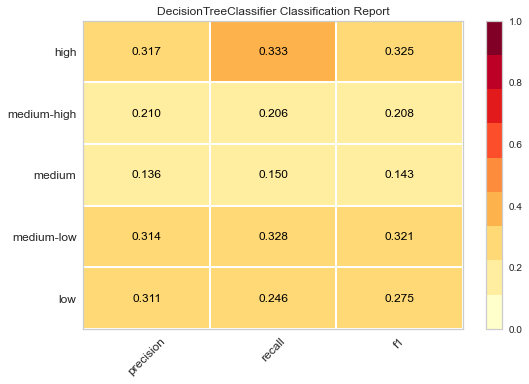

In [45]:
visualizer = ClassificationReport(clf, classes=['low','medium-low', "medium",'medium-high', 'high'])
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

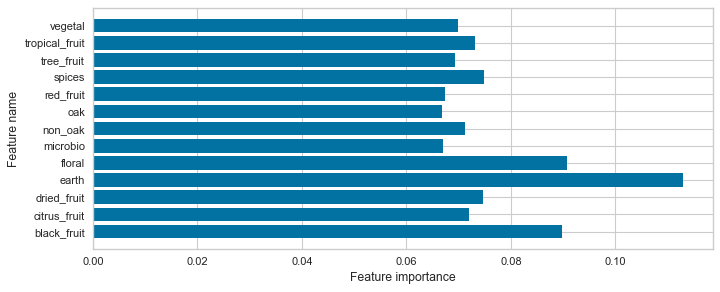

In [46]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, feature_names)
plt.show()

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



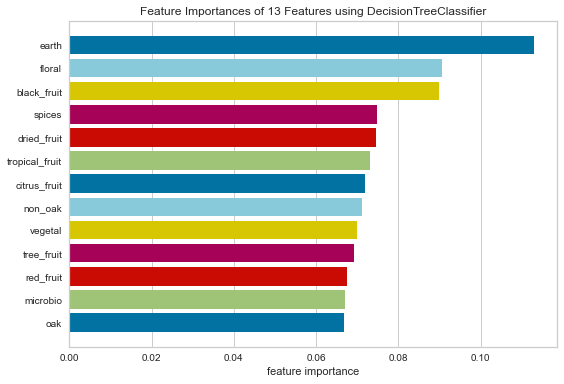

<AxesSubplot:title={'center':'Feature Importances of 13 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(clf, relative=False)
viz.fit(X_train,y_train) # Fit the data to the visualizer
viz.poof()

In [48]:
model = LinearSVC().fit(X_train, y_train)
print('Accuracy of LinearSVC classifier on training set: {:.2f}'
.format(model.score(X_train, y_train)))
print('Accuracy of LinearSVC classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of LinearSVC classifier on training set: 0.32
Accuracy of LinearSVC classifier on test set: 0.30


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



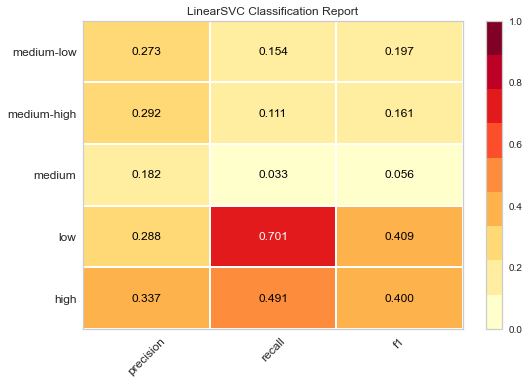

In [49]:
model = LinearSVC()

visualizer = ClassificationReport(model, classes=encoder.classes_)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [50]:
nbclf = GaussianNB().fit(X_train, y_train)
print('Wine dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Wine dataset
Accuracy of GaussianNB classifier on training set: 0.25
Accuracy of GaussianNB classifier on test set: 0.20


/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



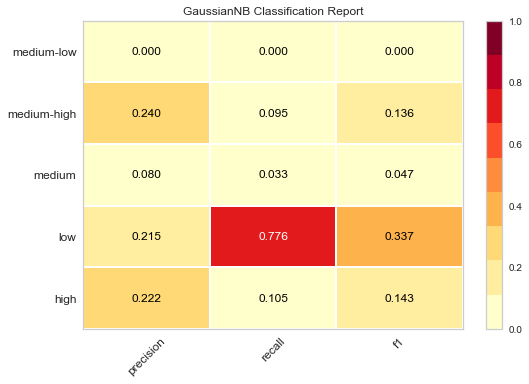

In [51]:
visualizer = ClassificationReport(nbclf, classes=encoder.classes_)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Rating

In [52]:
print(df['rating'].quantile(0.25))
print(df['rating'].quantile(0.5))
print(df['rating'].quantile(0.75))

3.8
3.9
4.1


In [53]:
cut_rating = ['bad','not bad', 'good', 'excellent']
cut_bins =[0, 3.8, 3.9, 4.1, 5]
df['rating_segment'] = pd.cut(df['rating'], bins=cut_bins, labels = cut_rating)
df

Unnamed: 0                                  name  year  wine ID  rating  \
0              0     Brut (Carte Jaune) Champagne N.V.  N.V.  1128385     4.3   
1              1          Impérial Brut Champagne N.V.  N.V.  1122095     4.1   
2              2        Edizione Cinque Autoctoni N.V.  N.V.    21646     4.3   
3              3  Special Cuvée Brut Aÿ Champagne N.V.  N.V.    18929     4.3   
4              4         Brut (Réserve) Champagne N.V.  N.V.  1129619     4.2   
...          ...                                   ...   ...      ...     ...   
3237        3237                   Medalla Malbec 2019  2019  5662688     3.9   
3238        3238         Reserve Syrah - Garnacha 2015  2015  5643330     3.9   
3239        3239      Reserva Especial Pinot Noir 2017  2017  1374725     3.8   
3240        3240                     Q Chardonnay 2020  2020    19428     3.9   
3241        3241            Numina Cabernet Franc 2020  2020  1783612     4.2   

          price             winery  winery_id  ratings_count country_name  \
0     48.470888     Veuve Clicquot       7979         120606           fr   
1     45.873358     Moët & Chandon       7799         107944           fr   
2     21.515389            Farnese       7892          61182           fr   
3     45.089198          Bollinger       7747          56458           fr   
4     38.227798         Taittinger       1285          44898           fr   
...         ...                ...        ...            ...          ...   
3237  17.162086           Trapiche       7931            421           ar   
3238  11.731046            Proemio      46478            415           ar   
3239  12.966608  Maycas del Limari      14981            404           ar   
3240  23.523192           Zuccardi       7729            394           ar   
3241  24.134184          Salentein       3754            387           ar   

      ...   non_oak       oak  red_fruit    spices  tree_fruit  \
0     ...  0.022296  0.015372   0.001352  0.002803    0.032237   
1     ...  0.021539  0.014915   0.001501  0.001881    0.032980   
2     ...  0.019385  0.027524   0.013157  0.018061    0.000196   
3     ...  0.042598  0.034362   0.002356  0.003808    0.049825   
4     ...  0.038109  0.029600   0.002205  0.004009    0.046906   
...   ...       ...       ...        ...       ...         ...   
3237  ...  0.325416  0.539192   0.244656  0.294537    0.004751   
3238  ...  0.019277  0.057831   0.024096  0.031325    0.002410   
3239  ...  0.089109  0.131188   0.180693  0.051980    0.007426   
3240  ...  0.200508  0.350254   0.000000  0.154822    0.258883   
3241  ...  0.136951  0.227390   0.100775  0.136951    0.002584   

      tropical_fruit   vegetal  region_num  price_segment  rating_segment  
0           0.001434  0.004585           1           high       excellent  
1           0.001454  0.004187           1           high            good  
2           0.000098  0.000801           1     medium-low       excellent  
3           0.002019  0.007917           1           high       excellent  
4           0.002606  0.005858           1    medium-high       excellent  
...              ...       ...         ...            ...             ...  
3237        0.000000  0.019002          10     medium-low         not bad  
3238        0.000000  0.004819          10            low         not bad  
3239        0.000000  0.014851          10            low             bad  
3240        0.101523  0.109137          10         medium         not bad  
3241        0.000000  0.023256          10         medium       excellent  

[3242 rows x 27 columns]

<AxesSubplot:>

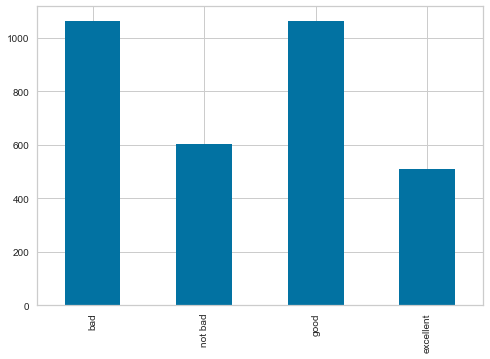

In [54]:
order = ['bad','not bad', 'good', 'excellent']
df.rating_segment.value_counts().sort_values().loc[order].plot(kind = 'bar')

<AxesSubplot:>

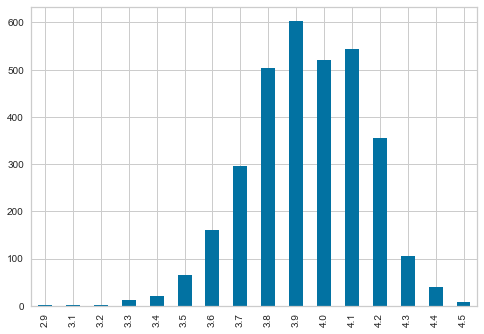

In [55]:
order = ['bad','not bad', 'good', 'excellent']
df['rating'].value_counts().sort_index().plot(kind = 'bar')

In [56]:
X = df[['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']]
encoder = LabelEncoder()
y = encoder.fit_transform(df['rating_segment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.1)

In [57]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.34


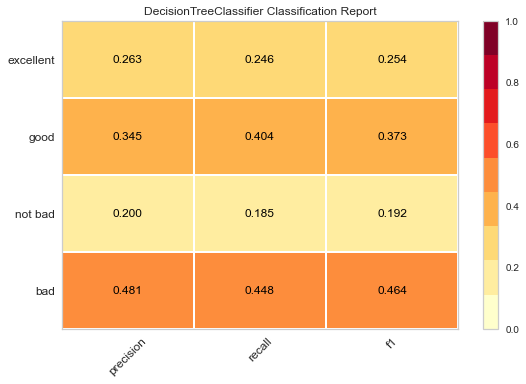

In [58]:
clf = DecisionTreeClassifier()

visualizer = ClassificationReport(clf, classes=['bad','not bad', 'good', 'excellent'])
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



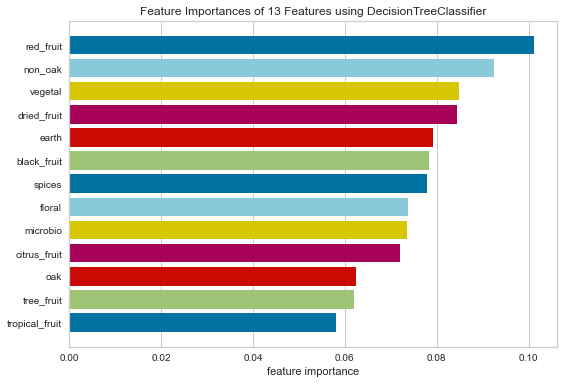

<AxesSubplot:title={'center':'Feature Importances of 13 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [59]:
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(clf, relative=False)
viz.fit(X_train,y_train) # Fit the data to the visualizer
viz.poof()

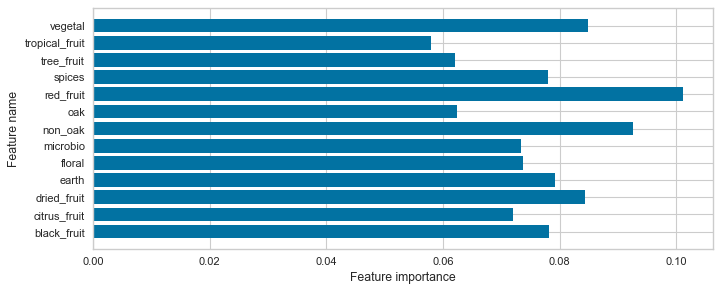

In [60]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, feature_names)
plt.show()

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/chieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



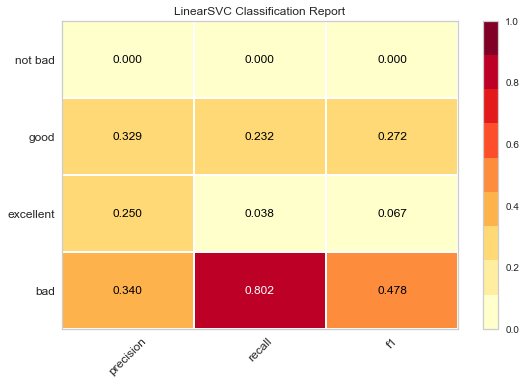

In [61]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

visualizer = ClassificationReport(model, classes=encoder.classes_)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [62]:
nbclf = GaussianNB().fit(X_train, y_train)
print('Wine dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Wine dataset
Accuracy of GaussianNB classifier on training set: 0.36
Accuracy of GaussianNB classifier on test set: 0.30


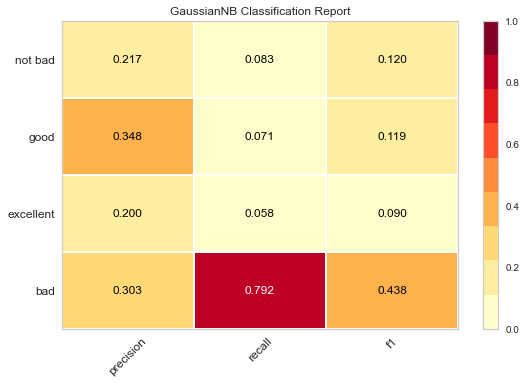

In [63]:
nbclf = GaussianNB()

visualizer = ClassificationReport(nbclf, classes=encoder.classes_)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Yellowbrick

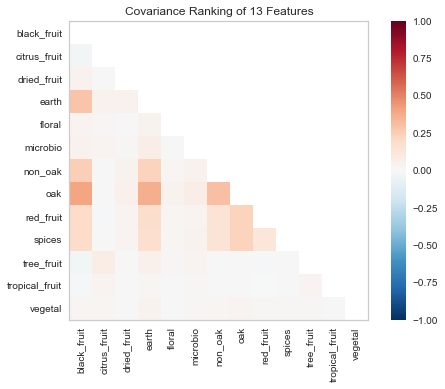

<AxesSubplot:title={'center':'Covariance Ranking of 13 Features'}>

In [64]:
from yellowbrick.features import Rank2D
X = df[['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']]
features=['black_fruit', 'citrus_fruit', 'dried_fruit', 'earth',
       'floral', 'microbio', 'non_oak', 'oak', 'red_fruit', 'spices',
       'tree_fruit', 'tropical_fruit', 'vegetal']
visualizer = Rank2D(features=features, algorithm='covariance')
visualizer.fit(X, df['rating_segment']) # Fit the data to the visualizer
visualizer.transform(X) # Transform the data
visualizer.poof() # Draw/show/poof the data